In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cocoex

In [33]:
f = []
suite = cocoex.Suite("bbob", "year:2023", "dimensions: 2")
bounds = [(-5., 5.), ] * 2
for i in range(24):
    f.append(suite.get_problem(i*15))

mindata = []
with open("Data\\data2D\\fmin.csv","r") as file:
    for  line in file:
        mindata.append(float(line.strip()))

In [34]:
n_calls = 100

In [35]:
DF = {}
simmin = 10000000000
for i in range(1,25,1):
    sim = []
    pre = []
    count1 = 1
    count2 = 1
    with open ("Data\\data2D\\f"+str(i)+".csv","r") as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if f[i-1](data)<simmin:
                simmin = f[i-1](data) 
            if count1%n_calls==0:
                sim.append((simmin-mindata[i-1])/abs(mindata[i-1]))
                simmin = 10000000000
            count1 = count1+1
    with open ("Data\\data2D\\f"+str(i)+"_pre.csv","r") as file:
        for line in file:
            data = [float(x) for x in line.strip().split(",")]
            if count2%n_calls==0:
                pre.append((f[i-1](data)-mindata[i-1])/abs(mindata[i-1]))
            count2 = count2+1

    DF['f'+str(i)] = [sim,pre]

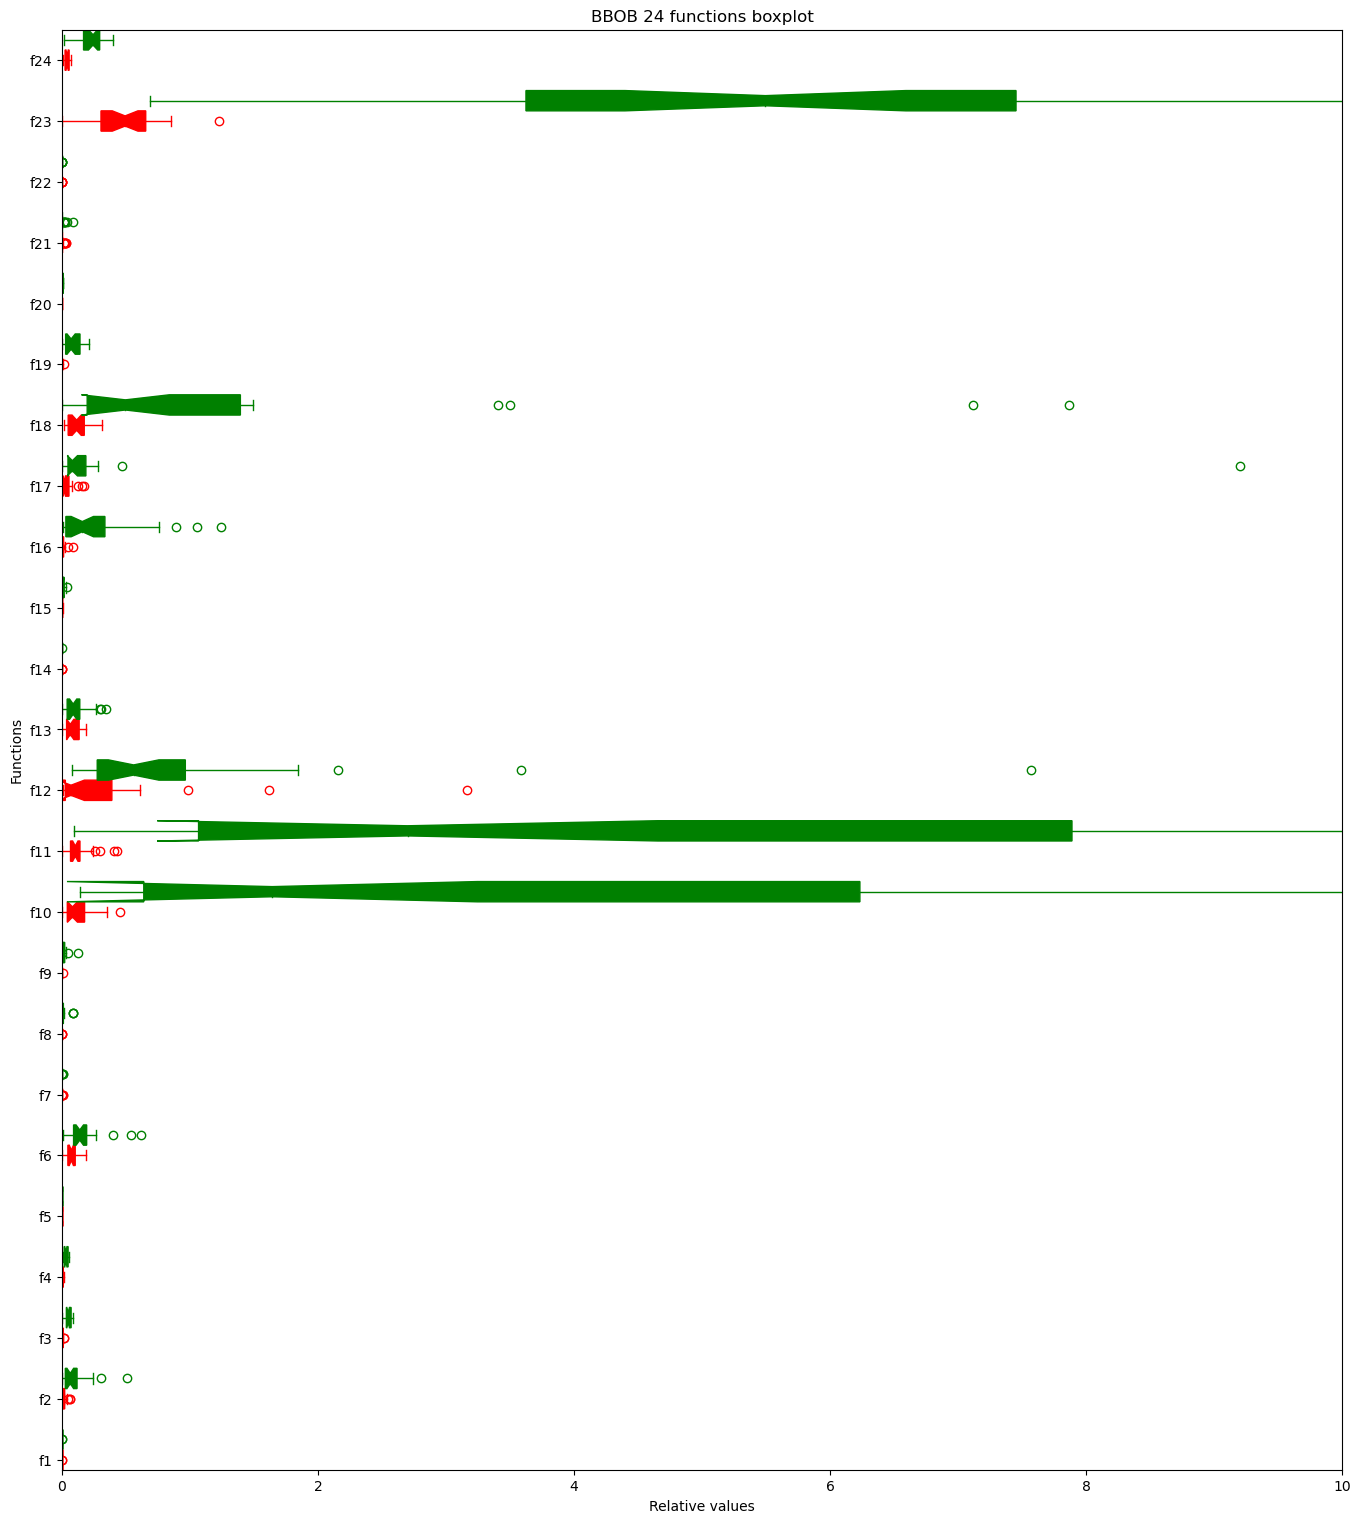

In [44]:
fig,ax = plt.subplots()

for idx,(func_name,func_data) in enumerate(DF.items()):
    position1 = [idx*3+1,]
    position2 = [idx*3+2,]
    c = 'red'
    c2 = 'green'
    ax.boxplot(func_data[0],positions=position1,vert=False,widths=1,notch=True, patch_artist=True,boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c),)
    ax.boxplot(func_data[1],positions=position2,vert=False,widths=1,notch=True, patch_artist=True,boxprops=dict(facecolor=c2, color=c2),
            capprops=dict(color=c2),whiskerprops=dict(color=c2),flierprops=dict(color=c2, markeredgecolor=c2),medianprops=dict(color=c2),)

ax.set_yticks(np.arange(1,24*3,step=3))
ax.set_yticklabels(DF.keys())
ax.set_xlim([0,10])

plt.title("BBOB 24 functions boxplot")
plt.xlabel("Relative values")
plt.ylabel('Functions')

plt.subplots_adjust(left=2,right=4,top=5,bottom=2)
plt.show()
